## Import Data


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_csv('airquality (1).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   5999 non-null   int64
 1   co2     5999 non-null   int64
 2   no2     5999 non-null   int64
 3   so2     5999 non-null   int64
 4   o3      5999 non-null   int64
dtypes: int64(5)
memory usage: 234.5 KB


In [3]:
# data = data.drop(columns = ['Timestamp','deviceId','payload_id'])
# data

In [4]:
data.isnull().sum()

PM2.5    0
co2      0
no2      0
so2      0
o3       0
dtype: int64

In [5]:
data.isna().sum()

PM2.5    0
co2      0
no2      0
so2      0
o3       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [8]:
data.describe(

)

,PM2.5,co2,no2,so2,o3
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,20.614936,2330.332889,100.995833,132.494916,124.645774
std,11.985017,2092.686367,89.962540,120.542128,59.050665
min,3.000000,40.000000,5.000000,1.000000,10.000000
25%,11.000000,624.500000,27.000000,35.000000,77.000000
50%,18.000000,1183.000000,48.000000,59.000000,123.000000
75%,28.000000,4092.500000,174.000000,229.000000,167.000000
max,48.000000,6999.000000,300.000000,400.000000,250.000000


In [9]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 0


In [10]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

No more outliers detected.
Number of rows after removing outliers iteratively: 5999


,PM2.5,co2,no2,so2,o3
0,25,40,40,40,180
1,26,6286,145,201,157
2,36,1970,152,336,76
3,47,6837,150,382,210
4,40,3979,39,373,84


In [11]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   5999 non-null   int64
 1   co2     5999 non-null   int64
 2   no2     5999 non-null   int64
 3   so2     5999 non-null   int64
 4   o3      5999 non-null   int64
dtypes: int64(5)
memory usage: 234.5 KB


In [12]:
# from sklearn.preprocessing import StandardScaler

# # Dataframe kamu: data_cleaned
# features = ["PM2.5 (ug/m3)", "PM10 (ug/m3)", "CO2 (ppm)", "Temperature (Celsius)", "Temperature (Fahrenheit)", "Humidity (%)"]


<Axes: >

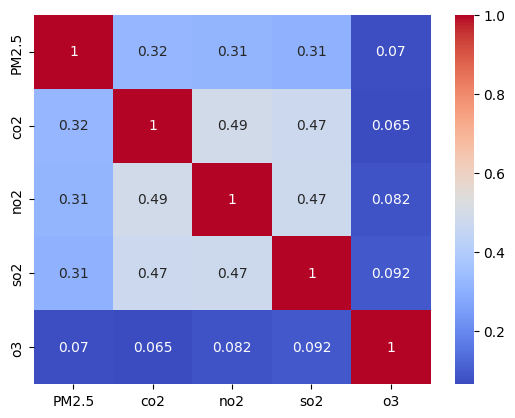

In [13]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [14]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

[0.140436907055349, 0.13156507538918177, 0.14574334233433217, 0.15102650293983777, 0.15539534884788306]
Jumlah klaster optimal berdasarkan Silhouette Score: 6

--- Hasil Klaster Optimal ---
Silhouette Score: 0.1554
Davies-Bouldin Index: 1.4713
Label Klaster:  [0 1 2 3 4 5]


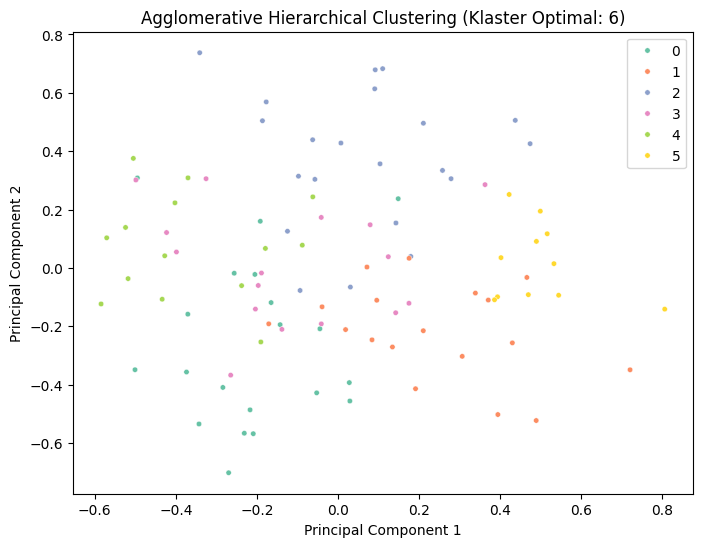


--- Profil Klaster Optimal ---
                 col1      col2      col3      col4      col5
Cluster_AHC                                                  
0            0.490900  0.233395  0.432395  0.289366  0.317548
1            0.454904  0.722983  0.750381  0.598592  0.250585
2            0.679809  0.763465  0.324740  0.589017  0.713025
3            0.367535  0.263787  0.569340  0.678698  0.737390
4            0.707731  0.385370  0.299978  0.838237  0.363716
5            0.326285  0.804980  0.719676  0.216245  0.715106


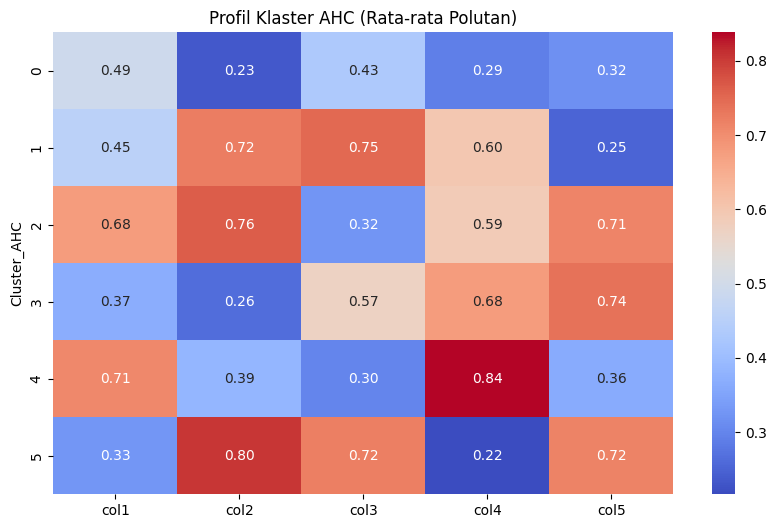

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import PCA
# %%
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# === 1. Definisikan model Agglomerative Hierarchical Clustering ===
# n_clusters bisa di-tuning (misalnya 2–6)
ahc = AgglomerativeClustering(n_clusters=3, linkage='ward')  
ahc_labels = ahc.fit_predict(X_train_scaled)

# === 2. Evaluasi Clustering ===
silhouette_avg_ahc = silhouette_score(X_train_scaled, ahc_labels)
db_index_ahc = davies_bouldin_score(X_train_scaled, ahc_labels)

print("Agglomerative Clustering Results")
print(f"Silhouette Score: {silhouette_avg_ahc:.4f}")
print(f"Davies-Bouldin Index: {db_index_ahc:.4f}")
print("Cluster labels:", np.unique(ahc_labels))

# === 3. Visualisasi PCA 2D ===
pca = PCA(n_components=2)
X_pca_ahc = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_ahc[:,0], y=X_pca_ahc[:,1], hue=ahc_labels, palette="Set2", s=15)
plt.title("Agglomerative Hierarchical Clustering (PCA 2D)")
plt.show()

# === 4. Profil Cluster ===
X_train["Cluster_AHC"] = ahc_labels
cluster_profile_ahc = X_train.groupby("Cluster_AHC").mean()
print("\nProfil Cluster AHC:")
print(cluster_profile_ahc)

sns.heatmap(cluster_profile_ahc, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster AHC (Rata-rata Polutan)")
plt.show()


In [34]:
# === 5. Pilih jumlah cluster, misal k=3 ===
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # HANYA FIT PADA TRAIN

KMeans(n_clusters=3, n_init=10, random_state=42)

In [35]:
# Assign cluster ke Train & Test
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)   # HANYA PREDICT, TIDAK FIT

             PM2.5          co2         no2         so2          o3
Cluster                                                            
0        26.109890  3619.475667  161.675824  213.300628  192.940345
1        14.523097   739.734712   33.214694   43.482182  116.893973
2        26.175719  3863.226038  162.419329  209.189297   68.801917


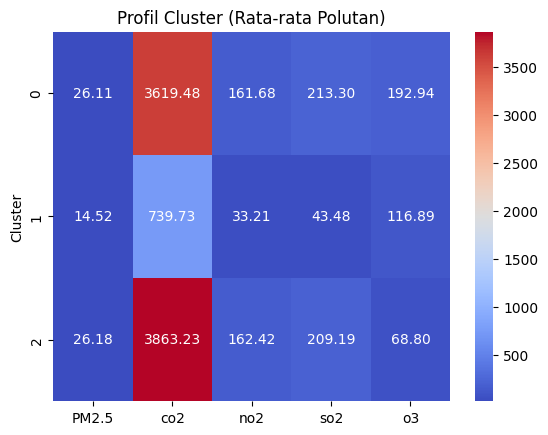

In [36]:
# Tambahkan ke dataframe
X_train["Cluster"] = train_clusters
X_test["Cluster"] = test_clusters

# === 6. Profil cluster ===
cluster_profile = X_train.groupby("Cluster").mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster (Rata-rata Polutan)")
plt.show()

In [37]:
# === 1. Jumlah data per cluster ===
print("Jumlah data per cluster:")
print(pd.Series(train_clusters).value_counts())

Jumlah data per cluster:
1    2273
0    1274
2    1252
Name: count, dtype: int64


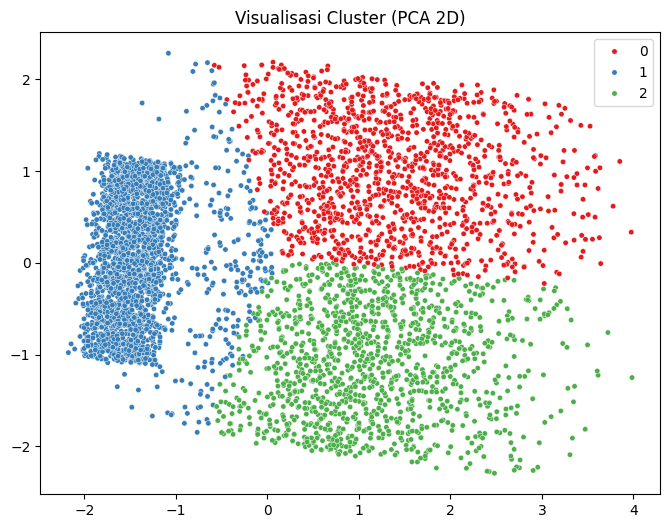

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# === 2. Scatterplot cluster (PCA 2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

In [39]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.3639940169946498
Davies-Bouldin Index: 1.586224190472084


In [50]:
# Gabungkan kembali train dan test yang sudah di-scale
import numpy as np

X_final = np.vstack([X_train_scaled, X_test_scaled])  # Gabung array
y_final = np.hstack([train_clusters, test_clusters])   # Gabung label cluster

In [51]:

# === 3. Siapkan data untuk klasifikasi ===

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)



=== Random Forest ===
Accuracy: 0.9969465648854962
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1524
           1       1.00      1.00      1.00      2136
           2       1.00      0.99      0.99       925

    accuracy                           1.00      4585
   macro avg       1.00      1.00      1.00      4585
weighted avg       1.00      1.00      1.00      4585



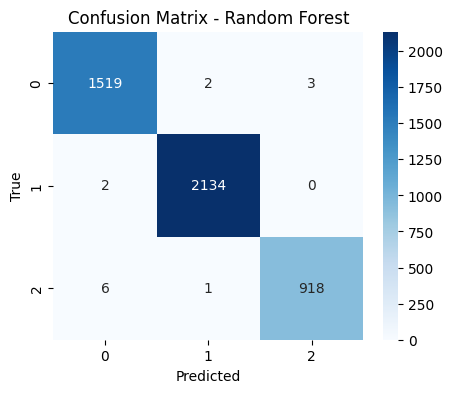


=== SVM ===
Accuracy: 0.9943293347873501
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1524
           1       1.00      1.00      1.00      2136
           2       0.99      0.98      0.99       925

    accuracy                           0.99      4585
   macro avg       0.99      0.99      0.99      4585
weighted avg       0.99      0.99      0.99      4585



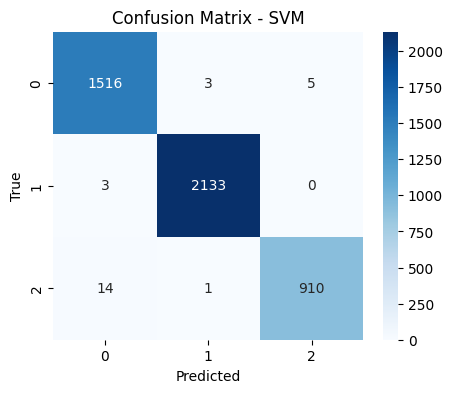


=== KNN ===
Accuracy: 0.9934569247546347
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1524
           1       1.00      1.00      1.00      2136
           2       0.99      0.98      0.99       925

    accuracy                           0.99      4585
   macro avg       0.99      0.99      0.99      4585
weighted avg       0.99      0.99      0.99      4585



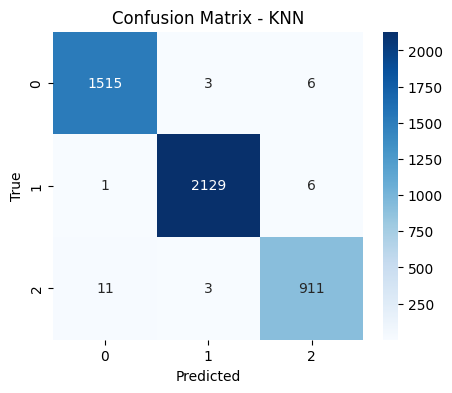


=== Naive Bayes ===
Accuracy: 0.9631406761177753
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1524
           1       0.98      0.97      0.98      2136
           2       0.94      0.97      0.95       925

    accuracy                           0.96      4585
   macro avg       0.96      0.96      0.96      4585
weighted avg       0.96      0.96      0.96      4585



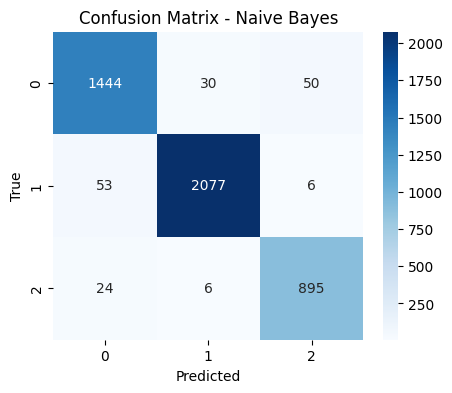


=== Decition Tree ===
Accuracy: 0.9928026172300981
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1524
           1       1.00      1.00      1.00      2136
           2       0.99      0.99      0.99       925

    accuracy                           0.99      4585
   macro avg       0.99      0.99      0.99      4585
weighted avg       0.99      0.99      0.99      4585



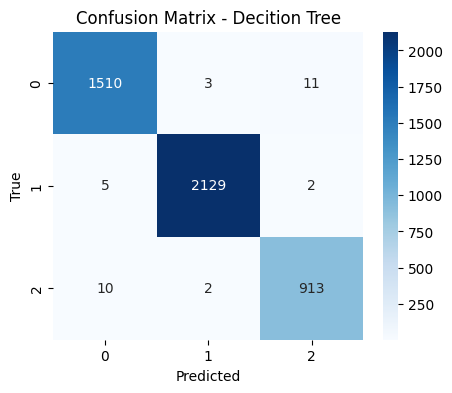

In [52]:
from sklearn.tree import DecisionTreeClassifier
# === 4. Definisi model ===
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decition Tree": DecisionTreeClassifier(random_state=42),
}

# === 5. Training & Evaluasi ===
for name, model in models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test_cls, y_pred))
    print(classification_report(y_test_cls, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_cls, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()